<a href="https://colab.research.google.com/github/skyezzzhang/machineintelligence/blob/master/Exercise%2008%20-%20Binary%20Classification%20with%203%20Artificial%20Neurons%20and%20a%20Cost%20Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### 3-layer neural network

Our dataset contains several 2D points:

In [37]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

labels = np.array([  1,
                    0,
                     1,
                    0,
                    0,
                     1,
                    0,
                     1,
                    0,
                    0])

In [38]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i, d in enumerate(data):
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

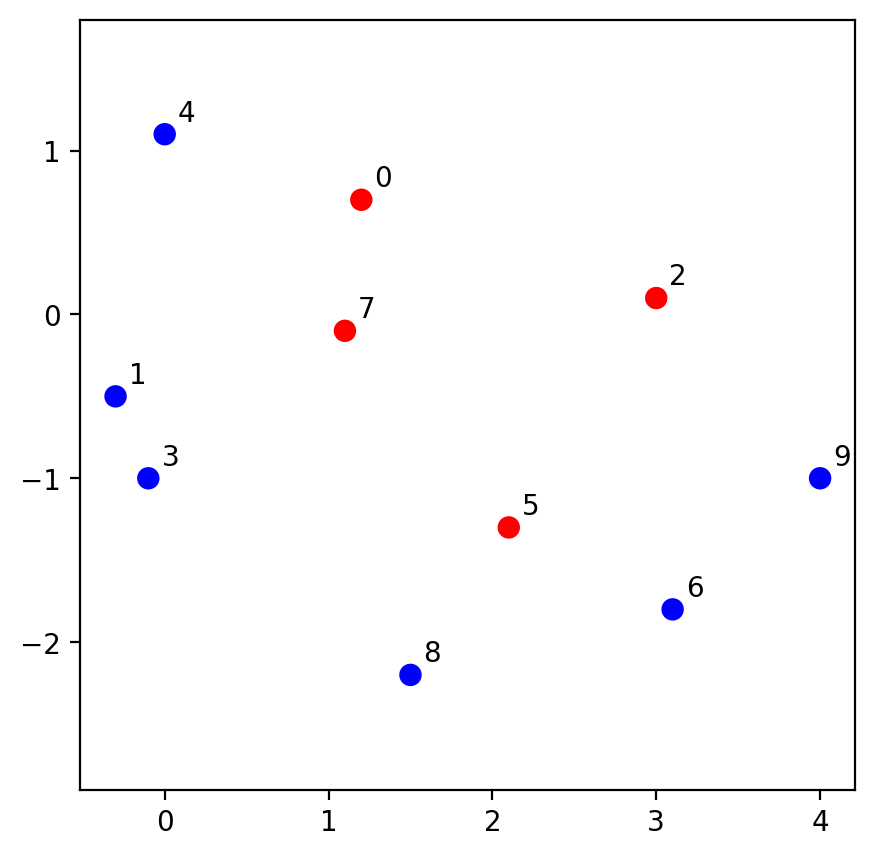

In [39]:
plot_data(data, labels)

This is the neural network's architecture:

<img src="https://github.com/skyezzzhang/machineintelligence/blob/master/img/neural_networks_23.png?raw=1" alt="drawing" width="650"/>

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def eval_accuracy_neural(params, data, labels):
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    num_correct = 0;
    data_len = len(data)

    for (X,Y), true_label in zip(data, labels):
        output = sigmoid(A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3)
        predicted_label = 1 if output >= 0.5 else 0

        if (predicted_label == true_label):
            num_correct += 1
    return num_correct / data_len

def plot_neural_simple(params, grid,data, labels, iteration, accuracy):
    nudge = 0.06
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    xx,yy,Z = grid

    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            output = sigmoid(A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3)
            predicted_label = 1 if output >= 0.5 else 0
            Z[i][j] = predicted_label

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    for i, d in enumerate(data):
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

The algorithm:

In [48]:
def train_neural_network(data, labels, step_size, no_epochs, iter_info):
    rnd = np.random.normal(size=9)
    data_length = len(data)

    # hidden layer neuron 1
    A1, B1, C1 = rnd[0], rnd[1], rnd[2]

    # hidden layer neuron 2
    A2, B2, C2 = rnd[3], rnd[4], rnd[5]

    # output layer neuron
    A3, B3, C3 = rnd[6], rnd[7], rnd[8]

    grid = create_meshgrid(data)

    for i in range(no_epochs):
        total_cost = 0.0
        tempdA1, tempdA2, tempdA3, tempdB1, tempdB2, tempdB3, tempdC1, tempdC2, tempdC3 = np.zeros(9)
        for (X, Y), label in zip(data, labels):
            # forward pass
            N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron
            N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron
            z3 = A3*N1 + B3*N2 + C3
            S = sigmoid(z3) # final activation
            C = (label - S) **2 # cost for a single data point
            total_cost += C

            #backward pass
            dz3 = -2 * (label - S) * S * (1 - S)
            dA3, dB3, dC3 = N1 * dz3, N2 * dz3, dz3

            dz1 = dz3 * A3 * N1 * (1 - N1)
            dA1, dB1, dC1 = X * dz1, Y * dz1, dz1

            dz2 = dz3 * B3 * N2 * (1 - N2)
            dA2, dB2, dC2 = X * dz2, Y * dz2, dz2

            tempdA1+= dA1
            tempdA2+= dA2
            tempdA3+= dA3
            tempdB1+= dB1
            tempdB2+= dB2
            tempdB3+= dB3
            tempdC1+= dC1
            tempdC2+= dC2
            tempdC3+= dC3

        tempdA1/= data_length
        tempdA2/= data_length
        tempdA3/= data_length
        tempdB1/= data_length
        tempdB2/= data_length
        tempdB3/= data_length
        tempdC1/= data_length
        tempdC2/= data_length
        tempdC3/= data_length

        # finally, do the parameter update
        A1 -= tempdA1 * step_size
        B1 -= tempdB1 * step_size
        C1 -= tempdC1 * step_size
        A2 -= tempdA2 * step_size
        B2 -= tempdB2 * step_size
        C2 -= tempdC2 * step_size
        A3 -= tempdA3 * step_size
        B3 -= tempdB3 * step_size
        C3 -= tempdC3 * step_size

        params = A1, A2, A3, B1, B2, B3, C1, C2, C3

        if (i%iter_info==0):
            #accuracy = eval_accuracy_neural(params,data,labels)
            #plot_neural_simple(params,grid, data, labels, i, accuracy)
            print(f'total_cost:{total_cost}')

    return (A1, A2, A3, B1, B2, B3, C1, C2, C3)

In [51]:
train = train_neural_network(data, labels, 2, 1000,10)

total_cost:3.162491750436644
total_cost:2.1597811472301642
total_cost:1.943650364416057
total_cost:1.8219232085080685
total_cost:1.729769897990657
total_cost:1.6463979546390433
total_cost:1.5647043076369407
total_cost:1.4848623598550037
total_cost:1.4095032544208412
total_cost:1.3401188752935047
total_cost:1.2766551957073091
total_cost:1.2186193564844991
total_cost:1.1656370490278407
total_cost:1.1174421426228818
total_cost:1.0737471617443413
total_cost:1.0341682335692295
total_cost:0.9982111031737456
total_cost:0.9652892359843046
total_cost:0.9347514396024732
total_cost:0.9059099487016153
total_cost:0.8780729010623508
total_cost:0.8505952450201089
total_cost:0.8229631393638311
total_cost:0.7949052723256198
total_cost:0.7664753896867034
total_cost:0.738018706725966
total_cost:0.7099996376572506
total_cost:0.6827984115078258
total_cost:0.656613395597692
total_cost:0.6314910092438979
total_cost:0.6074039975754433
total_cost:0.5843084219668895
total_cost:0.5621656114779614
total_cost:0.54

In [52]:
A1,A2,A3,B1,B2,B3,C1,C2,C3 = train
for i, ((X,Y), label) in enumerate(zip(data, labels)):
    output = sigmoid(A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3)
    predicted_label = 1 if output >= 0.5 else 0
    print (f'''data point {i}: real label : {label}, pred. label: {predicted_label}, prediction correct: {(label==predicted_label)}''')

data point 0: real label : 1, pred. label: 1, prediction correct: True
data point 1: real label : 0, pred. label: 0, prediction correct: True
data point 2: real label : 1, pred. label: 1, prediction correct: True
data point 3: real label : 0, pred. label: 0, prediction correct: True
data point 4: real label : 0, pred. label: 0, prediction correct: True
data point 5: real label : 1, pred. label: 1, prediction correct: True
data point 6: real label : 0, pred. label: 0, prediction correct: True
data point 7: real label : 1, pred. label: 1, prediction correct: True
data point 8: real label : 0, pred. label: 0, prediction correct: True
data point 9: real label : 0, pred. label: 0, prediction correct: True


#### Task 1:
Modify the previous code by adding the sigmoid activation to the output neuron and implementing the MSE cost function:

<img src="https://github.com/skyezzzhang/machineintelligence/blob/master/img/neural_networks_25c.png?raw=1" alt="drawing" width="900"/>

\begin{align*}
\frac{\partial C}{\partial z_3}&=-2(label-S) \cdot S(1-S) \\\\
\frac{\partial z_3}{\partial z_1}&=A_3 \cdot N_1(1-N_1) \\\\
\frac{\partial z_3}{\partial z_2}&=B_3 \cdot N_2(1-N_2)
\end{align*}

#### Task 2:
Loop through all the data point once and for each point print the coordinates and the label:

In [23]:
for (X, Y), current_label in zip(data, labels):
  print(f'X:{X}, Y:{Y}, label:{current_label}')

X:1.2, Y:0.7, label:1
X:-0.3, Y:-0.5, label:0
X:3.0, Y:0.1, label:1
X:-0.1, Y:-1.0, label:0
X:-0.0, Y:1.1, label:0
X:2.1, Y:-1.3, label:1
X:3.1, Y:-1.8, label:0
X:1.1, Y:-0.1, label:1
X:1.5, Y:-2.2, label:0
X:4.0, Y:-1.0, label:0


#### Task 3:
Loop through all the data three times. In each interation, print its index, and and for each point print the coordinates and the label:

In [28]:
for i in range(3):
    sumx, sumy = 0,0
    print(f'index:{i}')
    for (X, Y), current_label in zip(data, labels):
        sumx +=X
        sumy +=Y
        print(f'X:{X}, Y:{Y}, label:{current_label}')
    print(f'sumx:{sumx}, sumy:{sumy}')

index:0
X:1.2, Y:0.7, label:1
X:-0.3, Y:-0.5, label:0
X:3.0, Y:0.1, label:1
X:-0.1, Y:-1.0, label:0
X:-0.0, Y:1.1, label:0
X:2.1, Y:-1.3, label:1
X:3.1, Y:-1.8, label:0
X:1.1, Y:-0.1, label:1
X:1.5, Y:-2.2, label:0
X:4.0, Y:-1.0, label:0
sumx:15.6, sumy:-6.0
index:1
X:1.2, Y:0.7, label:1
X:-0.3, Y:-0.5, label:0
X:3.0, Y:0.1, label:1
X:-0.1, Y:-1.0, label:0
X:-0.0, Y:1.1, label:0
X:2.1, Y:-1.3, label:1
X:3.1, Y:-1.8, label:0
X:1.1, Y:-0.1, label:1
X:1.5, Y:-2.2, label:0
X:4.0, Y:-1.0, label:0
sumx:15.6, sumy:-6.0
index:2
X:1.2, Y:0.7, label:1
X:-0.3, Y:-0.5, label:0
X:3.0, Y:0.1, label:1
X:-0.1, Y:-1.0, label:0
X:-0.0, Y:1.1, label:0
X:2.1, Y:-1.3, label:1
X:3.1, Y:-1.8, label:0
X:1.1, Y:-0.1, label:1
X:1.5, Y:-2.2, label:0
X:4.0, Y:-1.0, label:0
sumx:15.6, sumy:-6.0


#### Task 4:
Modify the previous code by cumulatively summing `x` and `y` coordinates in each loop. Sum `x`'s in`sumx`and `y`'s in `sumy`. After each loop print the sum.

#### Task 5:
Modify the classification algorithm by introducing epochs and full-batch training (updating the weights and biases only after the neural network has seen all the data points once)